In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
from cartopy import config
import xarray as xr
import os


ValueError: Image "ETOPO" and resolution "high" are not present in the user background image metadata in directory "/apps/share64/debian10/anaconda/anaconda-7/envs/geospatial-2021-09/lib/python3.7/site-packages/cartopy/data/raster/natural_earth"

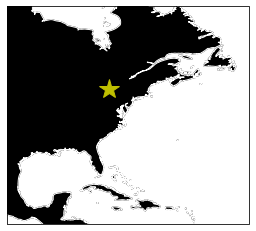

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the coastlines! Use zorder to define the layer it is plotted on
ax.coastlines(zorder=0)


# Add land! We have the ability to change the face and edge colors of the land
ax.add_feature(cartopy.feature.LAND,facecolor='black', edgecolor='white',zorder=1)


## Change the spatial extent that we see on our map
ax.set_extent([-100, -50, 15, 60], crs=ccrs.PlateCarree())

## Plot a point (yellow star) on our map
ax.plot(-78.87,42.88,'y*',zorder=4,transform =ccrs.PlateCarree(),markersize=20)


ax.background_img(name='ETOPO', resolution='high')

In [12]:
!ls '/apps/share64/debian10/anaconda/anaconda-7/envs/geospatial-2021-09/lib/python3.7/site-packages/cartopy/data/raster/natural_earth '

ls: cannot access '/apps/share64/debian10/anaconda/anaconda-7/envs/geospatial-2021-09/lib/python3.7/site-packages/cartopy/data/raster/natural_earth ': No such file or directory


Open a NetCDF using xarray

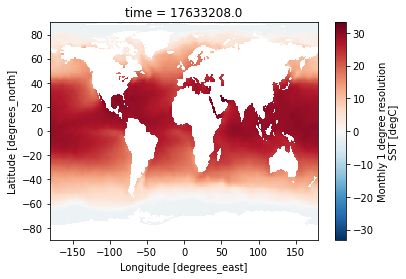

In [5]:
## Open the netCDF file that was supplied to us by cartopy
fname = os.path.join(config["repo_data_dir"],'netcdf', 'HadISST1_SST_update.nc')
dataset = xr.open_dataset(fname,decode_times=False)
sst = dataset['sst']
sst.plot()


Text(0.5, 1.0, 'Monthly 1 degree resolution SST')

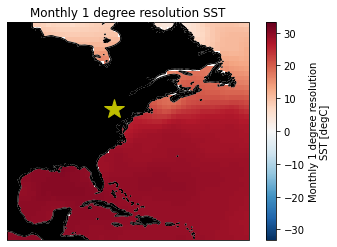

In [92]:
#Original Cartopy Map
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(zorder=10)
ax.add_feature(cartopy.feature.LAND,facecolor='black',edgecolor='white',zorder=5)
ax.set_extent([-100, -50, 15, 60], crs=ccrs.PlateCarree())
ax.plot(-78,42,'y*',zorder=15,transform =ccrs.PlateCarree(),markersize=20)


#Now plot the SST on the ax! 
sst.plot(ax=ax)
ax.set_title(sst.long_name)

In [14]:
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:4326", "ESRI:54052")
transformer.transform(-78,42)

(3035091.82489006, -8054650.339143485)